#### Collecting data API

In [1]:
import requests
import pandas as pd 

baseurl = "https://data.cityofchicago.org/resource/6zsd-86xi.json"

r = requests.get(baseurl)

print(r)

<Response [200]>


In [2]:
if r.status_code == 200:
    crime_data = r.json()
    
    crime_df = pd.DataFrame(crime_data)
    
    print(crime_df.head(2)) 
else:
    print("Failed to fetch data from the API.")

         id case_number                     date                       block  \
0  13377760    JH162963  2024-02-23T00:00:00.000  003XX N LOWER MICHIGAN AVE   
1  13380024    JH165791  2024-02-23T00:00:00.000           083XX S PEORIA ST   

   iucr       primary_type                      description  \
0  4650      OTHER OFFENSE  SEX OFFENDER - FAIL TO REGISTER   
1  1477  WEAPONS VIOLATION       RECKLESS FIREARM DISCHARGE   

  location_description  arrest  domestic  ... location_zip  \
0               STREET   False     False  ...                
1            RESIDENCE   False     False  ...                

  :@computed_region_awaf_s7ux :@computed_region_6mkv_f3dw  \
0                          22                       14309   
1                          18                       21554   

  :@computed_region_vrxf_vc4k :@computed_region_bdys_3d7i  \
0                          38                         580   
1                          70                         530   

  :@computed_r

In [3]:
crime_df.head(5)

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,location_zip,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_rpca_8um6,:@computed_region_d9mm_jgwp,:@computed_region_d3ds_rm58,:@computed_region_8hcu_yrd4
0,13377760,JH162963,2024-02-23T00:00:00.000,003XX N LOWER MICHIGAN AVE,4650,OTHER OFFENSE,SEX OFFENDER - FAIL TO REGISTER,STREET,False,False,...,,22,14309,38,580,36,42,22,88,42
1,13380024,JH165791,2024-02-23T00:00:00.000,083XX S PEORIA ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENCE,False,False,...,,18,21554,70,530,13,59,20,233,17
2,13380607,JH166506,2024-02-23T00:00:00.000,046XX W 87TH ST,1220,DECEPTIVE PRACTICE,THEFT OF LOST / MISLAID PROPERTY,SIDEWALK,False,False,...,,NaN,10412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13377753,JH162922,2024-02-23T00:00:00.000,005XX W HARRISON ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,GOVERNMENT BUILDING / PROPERTY,False,True,...,,48,14917,29,97,26,44,22,147,28
4,13382829,JH169101,2024-02-23T00:00:00.000,044XX W MADISON ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,VACANT LOT / LAND,False,False,...,,11,21572,27,716,23,30,16,90,28


#### Preprocessing

In [4]:
selected_columns = [
    'id', 'case_number', 'date', 'block', 'iucr', 'primary_type', 'description', 
    'location_description', 'arrest', 'domestic', 'beat', 'district', 'ward', 
    'community_area', 'fbi_code', 'year', 
    'updated_on', 'latitude', 'longitude', 'location_address', 
    'location_city', 'location_state', 'location_zip'
]


new_crime_df = crime_df[selected_columns].copy()


data_types = {
    'id': 'int',
    'case_number': 'string',
    'date': 'datetime64[ns]', # Convert to datetime data type
    'block': 'string',
    'iucr': 'string',
    'primary_type': 'string',
    'description': 'string',
    'location_description': 'string',
    'arrest': 'bool',
    'domestic': 'bool',
    'beat': 'string',
    'district': 'string',
    'ward': 'object',
    'community_area': 'string',
    'fbi_code': 'object',
    'year': 'object',
    'updated_on': 'datetime64[ns]',  # Convert to datetime data type
    'latitude': 'float64',  # Convert to float data type
    'longitude': 'float64', 
    'location_address': 'string',
    'location_city': 'string',
    'location_state': 'string',
    'location_zip': 'string'
}

new_crime_df= new_crime_df.astype(data_types)

# Display the data types of the new DataFrame
print(new_crime_df.dtypes)


id                               int32
case_number                     string
date                    datetime64[ns]
block                           string
iucr                            string
primary_type                    string
description                     string
location_description            string
arrest                            bool
domestic                          bool
beat                            string
district                        string
ward                            object
community_area                  string
fbi_code                        object
year                            object
updated_on              datetime64[ns]
latitude                       float64
longitude                      float64
location_address                string
location_city                   string
location_state                  string
location_zip                    string
dtype: object


In [5]:
# Checking for missing values
missing_values = new_crime_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                       0
case_number              0
date                     0
block                    0
iucr                     0
primary_type             0
description              0
location_description     1
arrest                   0
domestic                 0
beat                     0
district                 0
ward                     0
community_area           0
fbi_code                 0
year                     0
updated_on               0
latitude                16
longitude               16
location_address        16
location_city           16
location_state          16
location_zip            16
dtype: int64


In [6]:
# Checking for missing values
missing_values = new_crime_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                       0
case_number              0
date                     0
block                    0
iucr                     0
primary_type             0
description              0
location_description     1
arrest                   0
domestic                 0
beat                     0
district                 0
ward                     0
community_area           0
fbi_code                 0
year                     0
updated_on               0
latitude                16
longitude               16
location_address        16
location_city           16
location_state          16
location_zip            16
dtype: int64


In [7]:
import pandas as pd

# Assuming df is your DataFrame and 'date' is the column containing the date and time
# Convert the 'date' column to datetime format first
new_crime_df['date'] = pd.to_datetime(new_crime_df['date'])

# Separate date and time into new columns
new_crime_df['date_only'] = new_crime_df['date'].dt.date
new_crime_df['time_only'] = new_crime_df['date'].dt.time




In [8]:
new_crime_df.drop(columns=['location_address', 'location_city', 'location_state', 'location_zip'], inplace=True)

In [9]:
new_crime_df.dropna(inplace=True)

In [10]:
new_crime_df.head(5)

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,district,ward,community_area,fbi_code,year,updated_on,latitude,longitude,date_only,time_only
0,13377760,JH162963,2024-02-23,003XX N LOWER MICHIGAN AVE,4650,OTHER OFFENSE,SEX OFFENDER - FAIL TO REGISTER,STREET,False,False,...,001,42,32,26,2024,2024-03-01 15:42:00,41.887492,-87.624553,2024-02-23,00:00:00
1,13380024,JH165791,2024-02-23,083XX S PEORIA ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENCE,False,False,...,006,17,71,15,2024,2024-03-01 15:42:00,41.742866,-87.646303,2024-02-23,00:00:00
2,13380607,JH166506,2024-02-23,046XX W 87TH ST,1220,DECEPTIVE PRACTICE,THEFT OF LOST / MISLAID PROPERTY,SIDEWALK,False,False,...,008,18,70,11,2024,2024-03-01 15:42:00,41.734577,-87.736513,2024-02-23,00:00:00
3,13377753,JH162922,2024-02-23,005XX W HARRISON ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,GOVERNMENT BUILDING / PROPERTY,False,True,...,001,28,28,26,2024,2024-03-01 15:42:00,41.874382,-87.641537,2024-02-23,00:00:00
4,13382829,JH169101,2024-02-23,044XX W MADISON ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,VACANT LOT / LAND,False,False,...,011,28,26,07,2024,2024-03-01 15:42:00,41.880600,-87.736313,2024-02-23,00:00:00


#### Visualization

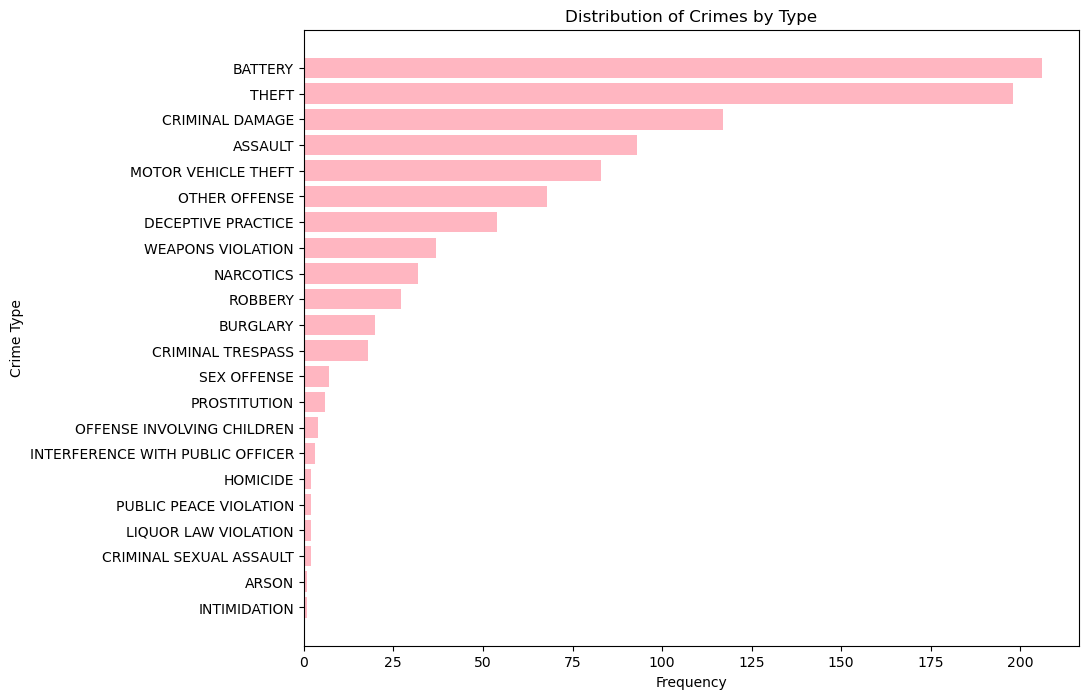

In [11]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
crime_type_counts = new_crime_df['primary_type'].value_counts()
crime_type_counts_sorted = crime_type_counts.sort_values(ascending=True)  # Sort the counts in ascending order

plt.barh(crime_type_counts_sorted.index, crime_type_counts_sorted.values, color='lightpink')
plt.title('Distribution of Crimes by Type')
plt.xlabel('Frequency')
plt.ylabel('Crime Type')
plt.show()


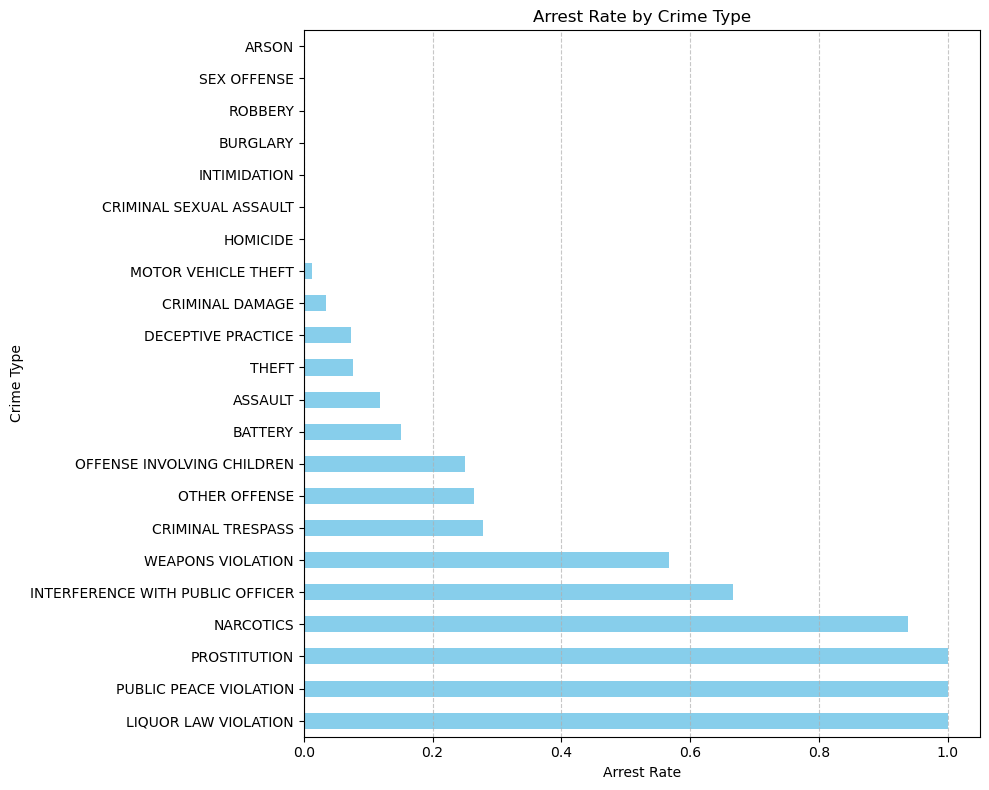

In [12]:
plt.figure(figsize=(10, 8))
arrest_rate = new_crime_df.groupby('primary_type')['arrest'].mean().sort_values(ascending=False)
arrest_rate.plot(kind='barh', color='skyblue')
plt.title('Arrest Rate by Crime Type')
plt.xlabel('Arrest Rate')
plt.ylabel('Crime Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [13]:
import folium
# Create a map centered around Chicago
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Add crime locations as circle markers to the map
for index, row in new_crime_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        fill=True,
        fill_opacity=0.6,
        color='red',
        fill_color='red',
        tooltip=f"{row['primary_type']}: {row['description']}"
    ).add_to(chicago_map)

# Display the map
chicago_map


In [14]:
import folium
from folium.plugins import HeatMap

crime_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

heat_data = new_crime_df[['latitude', 'longitude']].dropna().values.tolist()
HeatMap(heat_data, radius=10).add_to(crime_map)

crime_map

In [15]:
import folium

crime_types = ['ASSAULT', 'THEFT', 'BATTERY']

chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

colors = {'ASSAULT': 'red', 'THEFT': 'blue', 'BATTERY': 'green'}

for crime_type in crime_types:
    crime_df = new_crime_df[new_crime_df['primary_type'] == crime_type]
    for index, row in crime_df.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=2,
            fill=True,
            fill_opacity=0.6,
            color=colors[crime_type],
            fill_color=colors[crime_type],
            tooltip=f"{row['primary_type']}: {row['description']}"
        ).add_to(chicago_map)

chicago_map


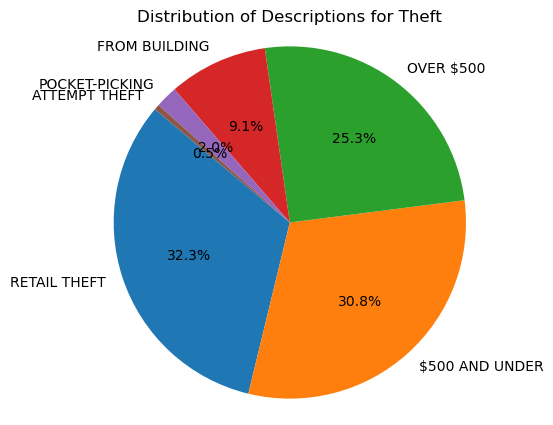

In [16]:
import matplotlib.pyplot as plt
theft_df = new_crime_df[new_crime_df['primary_type'] == 'THEFT']

description_counts = theft_df['description'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(description_counts, labels=description_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Descriptions for Theft')
plt.axis('equal')  
plt.show()


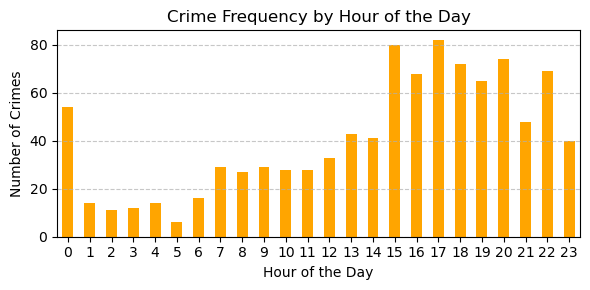

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

new_crime_df['hour_of_day'] = new_crime_df['date'].dt.hour

# Plotting crime frequency by hour of the day
plt.figure(figsize=(6, 3))
new_crime_df['hour_of_day'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Crime Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


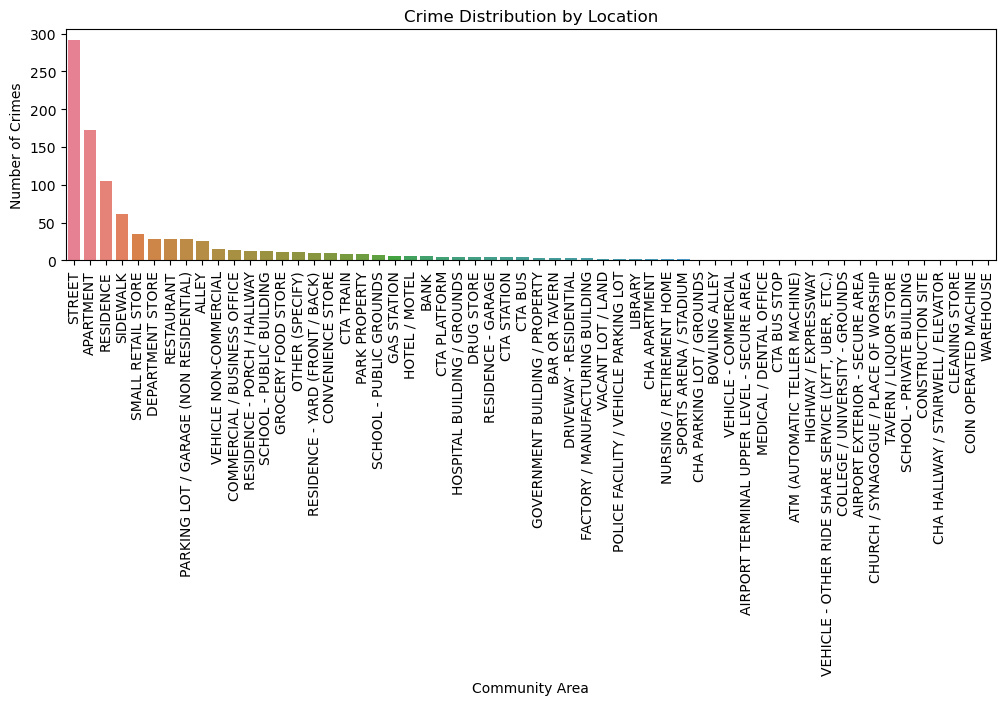

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

crime_count_by_community = new_crime_df['location_description'].value_counts()

# Plotting crime distribution by community area
plt.figure(figsize=(12, 3))
sns.barplot(x=crime_count_by_community.index, y=crime_count_by_community.values, palette='husl')
plt.title('Crime Distribution by Location')
plt.xlabel('Community Area')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()


Clustering: 

- 1) Kmeans:- 

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

categorical_columns = ['location_description','primary_type']

features = [
    'latitude', 'longitude', 'arrest', 'domestic'
] + categorical_columns 

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False), categorical_columns),  # Use sparse=False for dense matrix
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Scale numerical features
    ('kmeans', KMeans(n_clusters=3, random_state=42))  # Perform KMeans clustering
])

X = new_crime_df[features]

pipeline.fit(X)

cluster_labels = pipeline.named_steps['kmeans'].labels_

new_crime_df['cluster'] = cluster_labels

cluster_explanation = {
    0: "High Crime Rate Areas with frequent arrests and domestic incidents in public locations.",
    1: "Moderate Crime Rate Areas with occasional arrests and domestic incidents in residential or private properties.",
    2: "Low Crime Rate Areas with rare or no arrests and domestic incidents in commercial or business districts."
}

for cluster, explanation in cluster_explanation.items():
    print(f"Cluster {cluster}: {explanation}")


C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0: High Crime Rate Areas with frequent arrests and domestic incidents in public locations.
Cluster 1: Moderate Crime Rate Areas with occasional arrests and domestic incidents in residential or private properties.
Cluster 2: Low Crime Rate Areas with rare or no arrests and domestic incidents in commercial or business districts.


In [20]:
import folium

mean_lat = new_crime_df['latitude'].mean()
mean_lon = new_crime_df['longitude'].mean()
crime_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=10)

cluster_colors = ['blue', 'orange', 'black']

for index, row in new_crime_df.iterrows():
    cluster_color = cluster_colors[row['cluster']]
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=cluster_color,
        fill=True,
        fill_color=cluster_color
    ).add_to(crime_map)

crime_map


C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

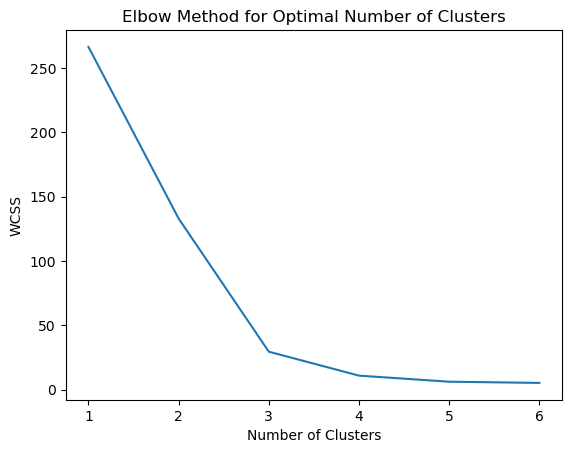

In [22]:
#Elbow method:

numerical_features = ['latitude', 'longitude', 'arrest', 'domestic']

X_numerical = new_crime_df[numerical_features]

wcss = []
for i in range(1,7):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_numerical)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 7), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

- 2) Heirarchical:

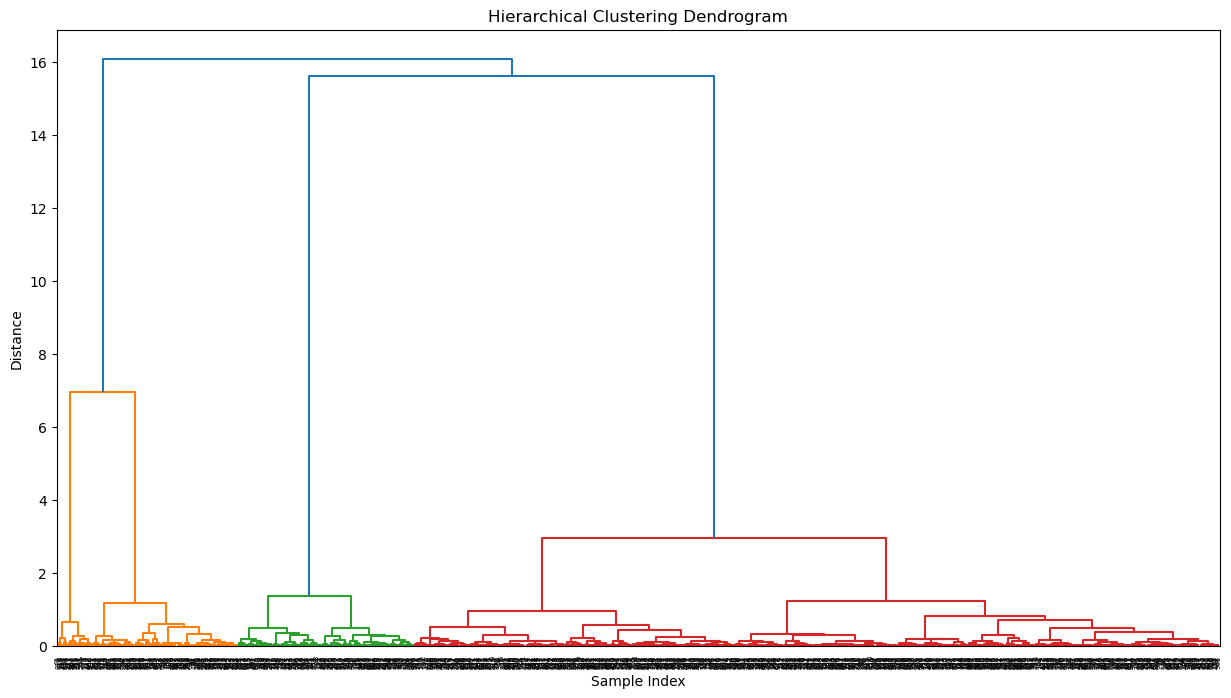

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

numerical_columns = ['latitude', 'longitude', 'arrest', 'domestic']
X_numeric = new_crime_df[numerical_columns]

Z = linkage(X_numeric, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(Z)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


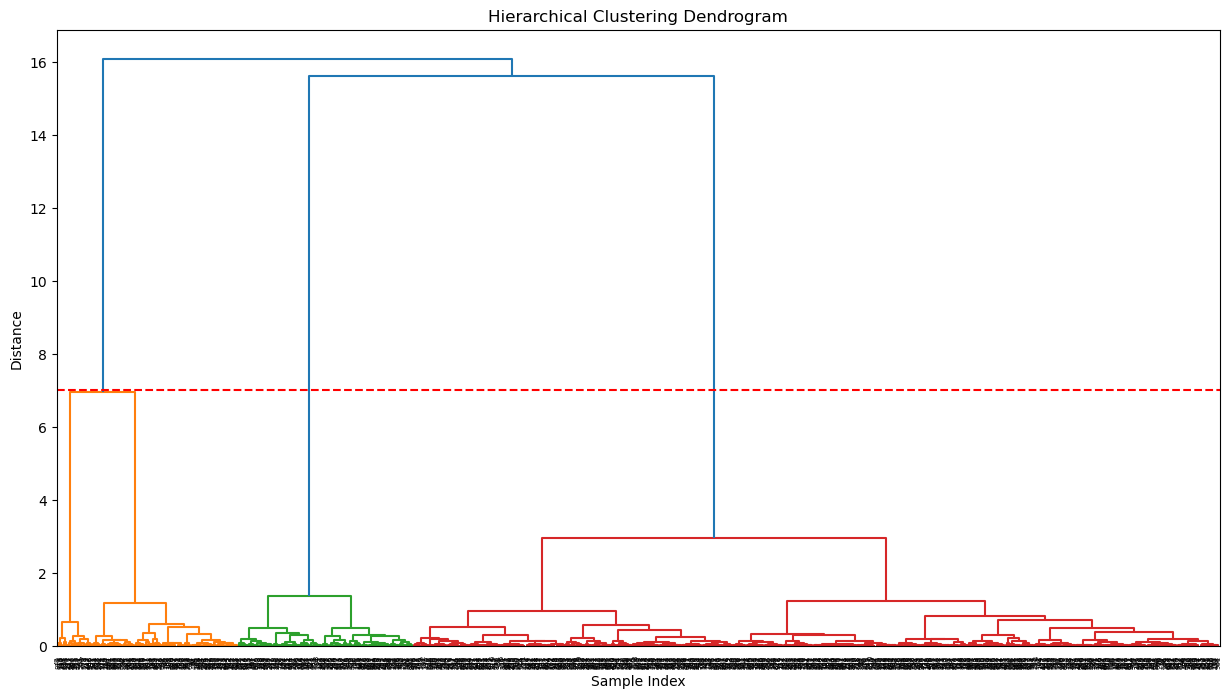

In [37]:
# Let's cut the Dendogram at level 4 to get 3 clusters for heirarchical clustering

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

numerical_columns = ['latitude', 'longitude', 'arrest', 'domestic']
X_numeric = new_crime_df[numerical_columns]

Z = linkage(X_numeric, method='ward')

# Plotting dendrogram
plt.figure(figsize=(15, 8))
dendrogram(Z)

height = 7 
plt.axhline(y=height, color='r', linestyle='--', label=f'Height = {height}')

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [31]:
#Now forming actual clusters by applying agglomerative clustering

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

categorical_columns = ['location_description','primary_type']

features = [
    'latitude', 'longitude', 'arrest', 'domestic'
] + categorical_columns  # Include categorical columns for clustering

# Preprocessing pipeline for encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False), categorical_columns),  # Use sparse=False for dense matrix
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()), 
    ('agglomerative', AgglomerativeClustering(n_clusters=3))  # Performing hierarchical clustering
])

X = new_crime_df[features]

pipeline.fit(X)

# Get cluster labels
cluster_labels = pipeline.named_steps['agglomerative'].labels_

new_crime_df['cluster'] = cluster_labels

for cluster, explanation in cluster_explanation.items():
    print(f"Cluster {cluster}: {explanation}")


Cluster 0: High Crime Rate Areas with frequent arrests and domestic incidents in public locations.
Cluster 1: Moderate Crime Rate Areas with occasional arrests and domestic incidents in residential or private properties.
Cluster 2: Low Crime Rate Areas with rare or no arrests and domestic incidents in commercial or business districts.


C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [35]:
import folium

mean_lat = new_crime_df['latitude'].mean()
mean_lon = new_crime_df['longitude'].mean()
crime_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=10)

cluster_colors = ['yellow', 'pink', 'red']

for index, row in new_crime_df.iterrows():
    cluster_color = cluster_colors[row['cluster']]
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=cluster_color,
        fill=True,
        fill_color=cluster_color
    ).add_to(crime_map)

# Display the map
crime_map


- Performing PCA

In [26]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_columns = ['primary_type', 'description', 'location_description']
numerical_columns = ['arrest', 'domestic', 'beat', 'district', 'ward', 'community_area', 'year', 'latitude', 'longitude']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ],
    remainder='drop'  
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svd', TruncatedSVD(n_components=2))  
])

X = new_crime_df.drop(['id', 'case_number', 'date', 'block', 'iucr', 'fbi_code', 'updated_on', 'date_only', 'time_only'], axis=1)

X_svd = pipeline.fit_transform(X)

svd_df = pd.DataFrame(data=X_svd, columns=['SVD1', 'SVD2'])


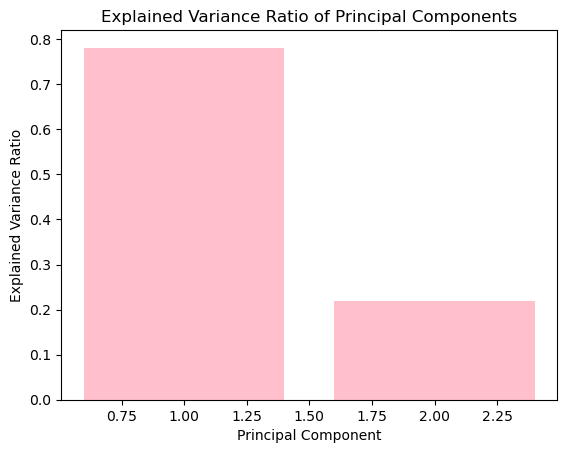

In [27]:
import matplotlib.pyplot as plt

explained_variance = pipeline.named_steps['svd'].explained_variance_

explained_variance_ratio = explained_variance / explained_variance.sum()

plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='pink')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()
